In [1]:
from datetime import date
from enum import Enum

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy import stats

import network as network
from preprocess_data import Game, PowerPlay, Situation, calculate_time, read_networks

In [2]:
def regular_networks():
    for nw in read_networks(Situation.REGULAR):
        degree_mean = network.degree_mean(nw)
        degree_std = network.degree_std(nw)
        time = calculate_time(nw.graph["game"], None)
        yield {"degree_mean": degree_mean, "degree_std": degree_std, "time": time}

In [3]:
def power_play_networks():
    for nw in read_networks(Situation.POWER_PLAY):
        if len(nw.nodes) > 0:
            degree_mean = network.degree_mean(nw)
            degree_std = network.degree_std(nw)
            time = calculate_time(nw.graph["game"], [nw.graph["pp"]])
            yield {"degree_mean": degree_mean, "degree_std": degree_std, "time": time}

In [4]:
def penalty_kill_networks():
    for nw in read_networks(Situation.PENALTY_KILL):
        if len(nw.nodes) > 0:
            degree_mean = network.degree_mean(nw)
            degree_std = network.degree_std(nw)
            time = calculate_time(nw.graph["game"], [nw.graph["pp"]])
            yield {"degree_mean": degree_mean, "degree_std": degree_std, "time": time}

KeyError: 'pp'

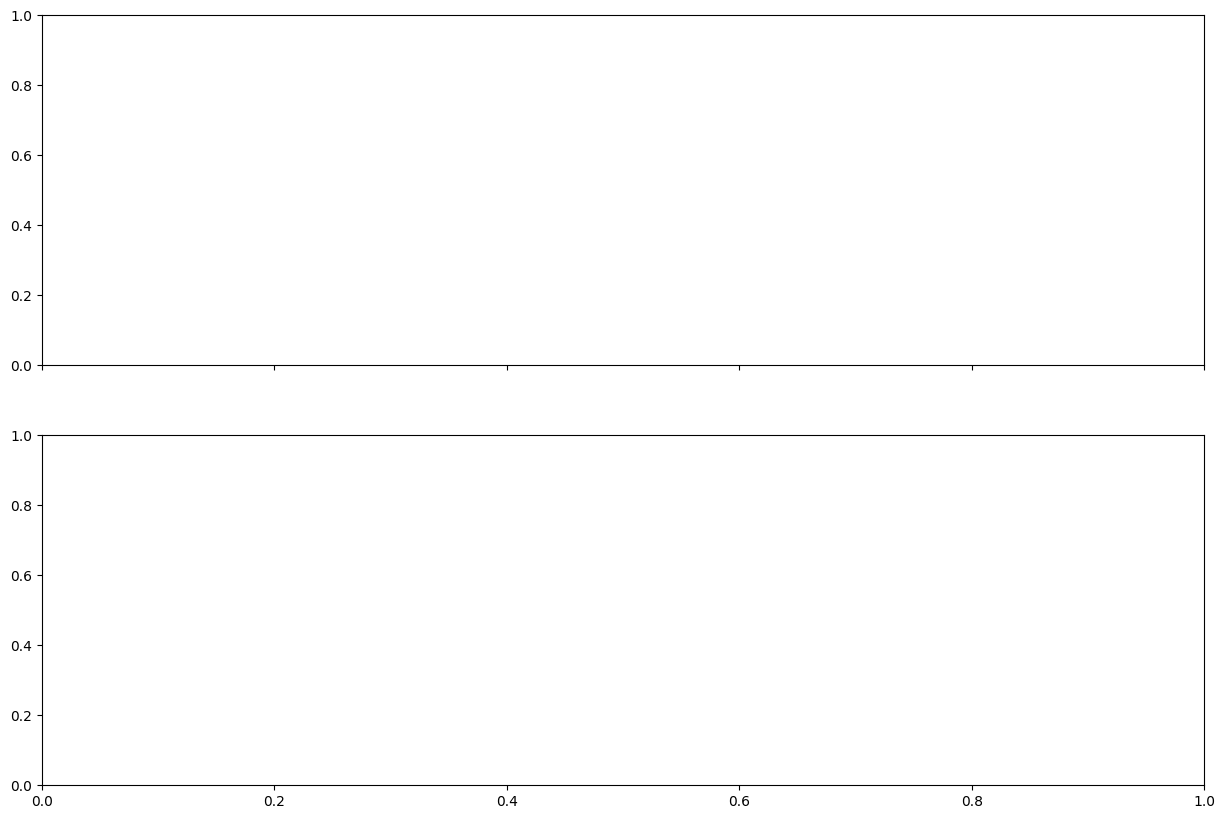

In [5]:
# (Weighted) Degree Mean: Regular vs Power Play
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(15)

x_reg = [stats["degree_mean"] / stats["time"] for stats in regular_networks()]
x_pp = [stats["degree_mean"] / stats["time"] for stats in power_play_networks()]
n, bins, patches = axs[0].hist(x_reg, facecolor="blue", alpha=0.5)
n, bins, patches = axs[1].hist(x_pp, facecolor="blue", alpha=0.5)
axs[0].set_title("Regular Networks")
axs[1].set_title("Power Play Networks")

plt.show()

stats.ttest_ind(x_reg, x_pp, alternative="less")

AttributeError: 'str' object has no attribute 'game'

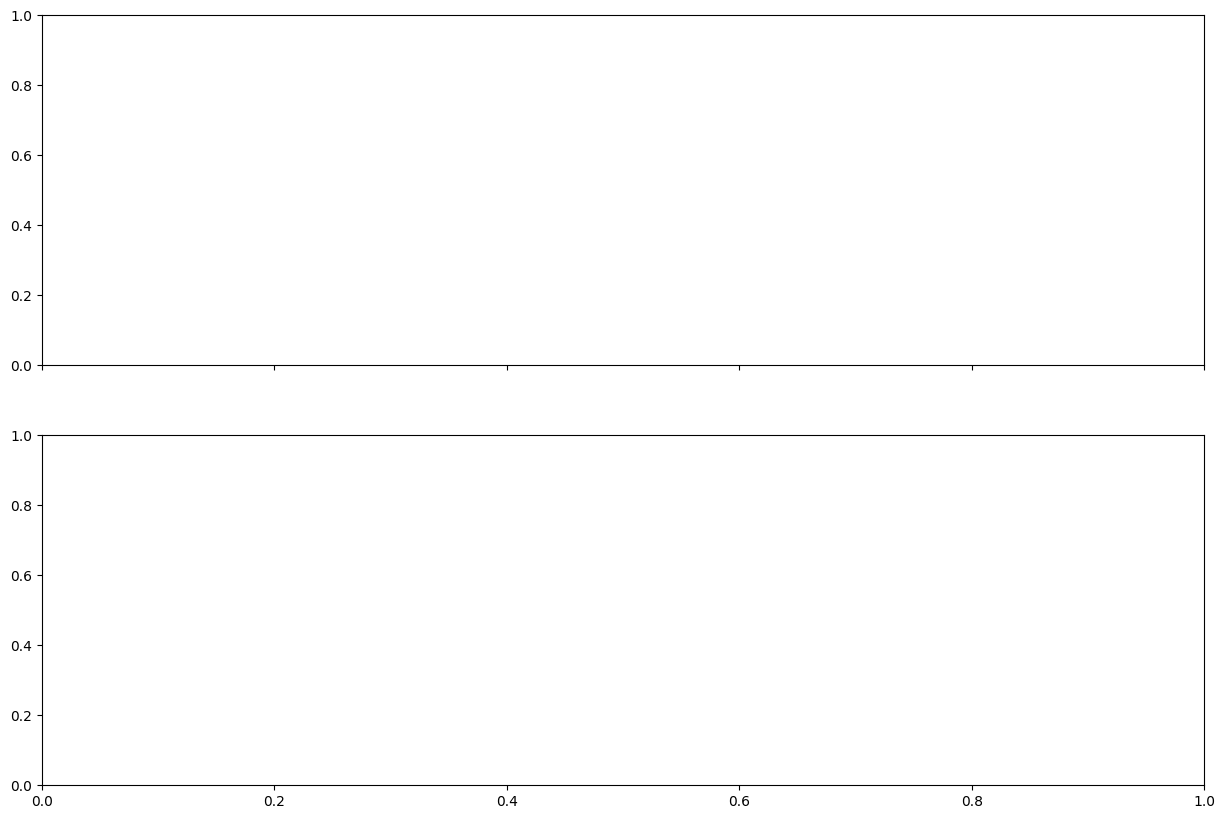

In [ ]:
# (Weighted) Degree Std: Regular vs Power Play
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(15)

x_reg = [stats["degree_std"] / stats["time"] for stats in regular_networks()]
x_pp = [stats["degree_std"] / stats["time"] for stats in power_play_networks()]
n, bins, patches = axs[0].hist(x_reg, facecolor="blue", alpha=0.5)
n, bins, patches = axs[1].hist(x_pp, facecolor="blue", alpha=0.5)
axs[0].set_title("Regular Networks")
axs[1].set_title("Power Play Networks")

plt.show()

stats.ttest_ind(x_reg, x_pp, alternative="less")

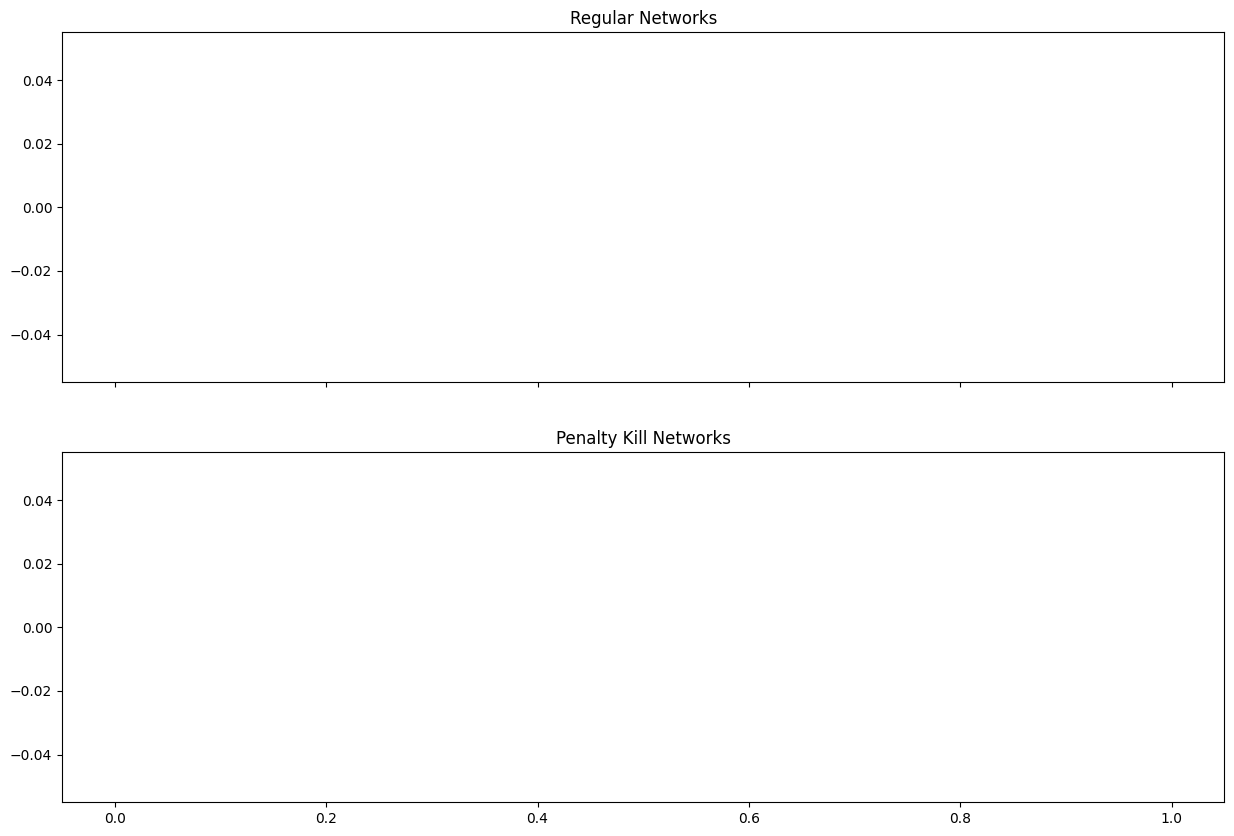

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [ ]:
# (Weighted) Degree Mean: Regular vs Penalty Kill
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(15)

x_reg = [stats["degree_mean"] / stats["time"] for stats in regular_networks()]
x_pk = [stats["degree_mean"] / stats["time"] for stats in penalty_kill_networks()]
n, bins, patches = axs[0].hist(x_reg, facecolor="blue", alpha=0.5)
n, bins, patches = axs[1].hist(x_pk, facecolor="blue", alpha=0.5)
axs[0].set_title("Regular Networks")
axs[1].set_title("Penalty Kill Networks")

plt.show()

stats.ttest_ind(x_reg, x_pk, alternative="greater")